# **Ransome analysis using ML and DL**

In [24]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.model_selection import train_test_split
from keras.models import  Sequential
from keras.layers import Dense
import keras.activations,keras.losses
import numpy as np
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier

# **Data grabbing**

In [25]:
lab=LabelEncoder()
data=pd.read_csv(r'C:\Users\samso\OneDrive\Desktop\Advanced Data Analytics 4th Trisemester\Medium Blog\UGRansome_Dataset.csv')
print(data.columns)
print(data.info())
print(data.isna().sum())
print(data.describe())

Index(['Time', 'Protcol', 'Flag', 'Family', 'Clusters', 'SeddAddress',
       'ExpAddress', 'BTC', 'USD', 'Netflow_Bytes', 'IPaddress', 'Threats',
       'Port', 'Prediction'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149043 entries, 0 to 149042
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Time           149043 non-null  int64 
 1   Protcol        149043 non-null  object
 2   Flag           149043 non-null  object
 3   Family         149043 non-null  object
 4   Clusters       149043 non-null  int64 
 5   SeddAddress    149043 non-null  object
 6   ExpAddress     149043 non-null  object
 7   BTC            149043 non-null  int64 
 8   USD            149043 non-null  int64 
 9   Netflow_Bytes  149043 non-null  int64 
 10  IPaddress      149043 non-null  object
 11  Threats        149043 non-null  object
 12  Port           149043 non-null  int64 
 13  Prediction     149043 non

# **grabbing the Object column**

In [26]:
new=[]
for i in data.select_dtypes(include='object').columns.values:
    if len(data[i].value_counts().values) < 10:
        new.append(i)

# **Type conversion and its analysis**

In [27]:
lab=LabelEncoder()
for i in data[new]:
    data[i]=lab.fit_transform(data[i])

print(data.info())


print(data['Family'].value_counts())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149043 entries, 0 to 149042
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Time           149043 non-null  int64 
 1   Protcol        149043 non-null  int32 
 2   Flag           149043 non-null  int32 
 3   Family         149043 non-null  object
 4   Clusters       149043 non-null  int64 
 5   SeddAddress    149043 non-null  int32 
 6   ExpAddress     149043 non-null  int32 
 7   BTC            149043 non-null  int64 
 8   USD            149043 non-null  int64 
 9   Netflow_Bytes  149043 non-null  int64 
 10  IPaddress      149043 non-null  int32 
 11  Threats        149043 non-null  int32 
 12  Port           149043 non-null  int64 
 13  Prediction     149043 non-null  int32 
dtypes: int32(7), int64(6), object(1)
memory usage: 11.9+ MB
None
Family
Locky               25062
SamSam              19657
WannaCry            16110
JigSaw              13712
Flyper  

# **Outlier detection and deduction**

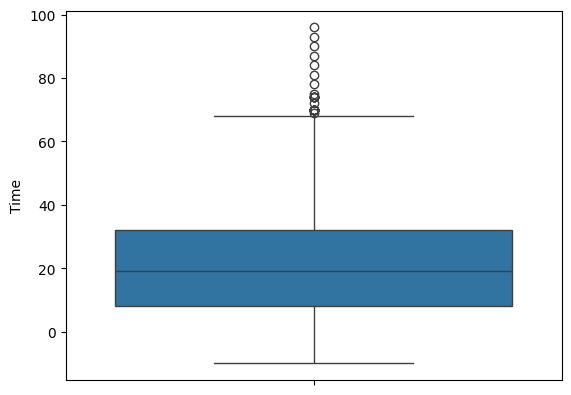

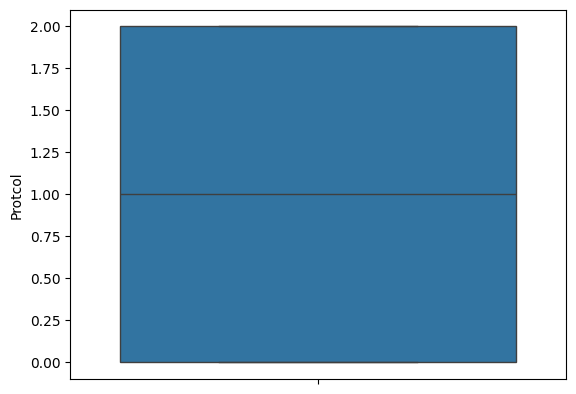

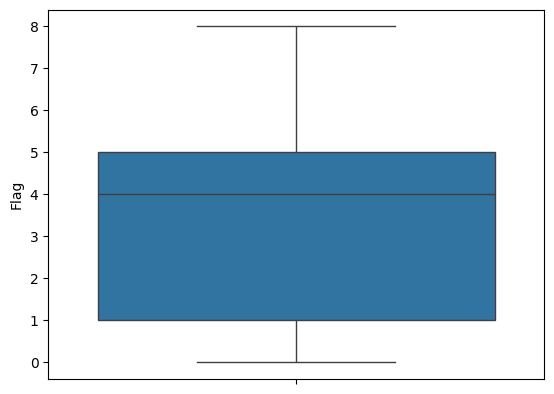

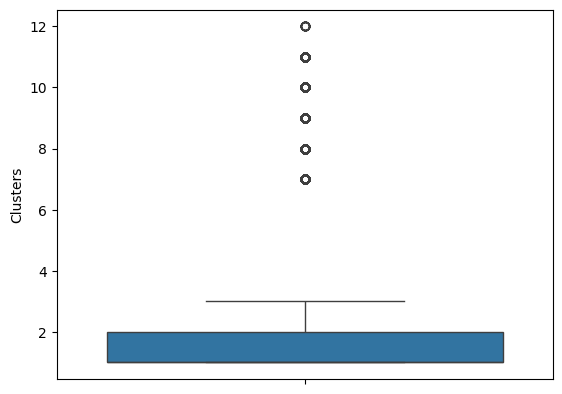

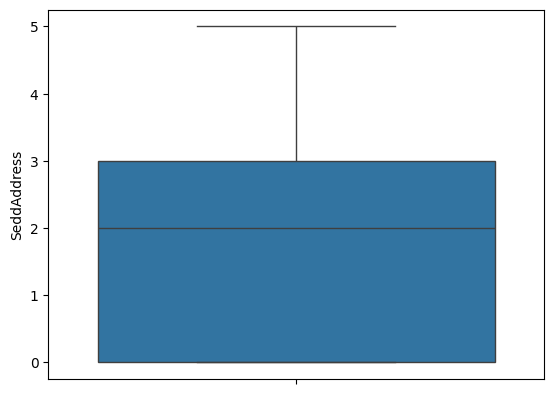

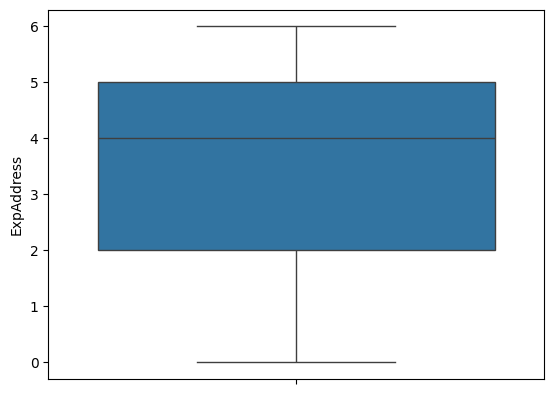

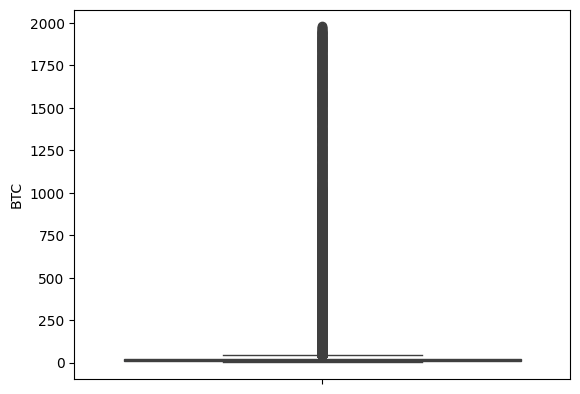

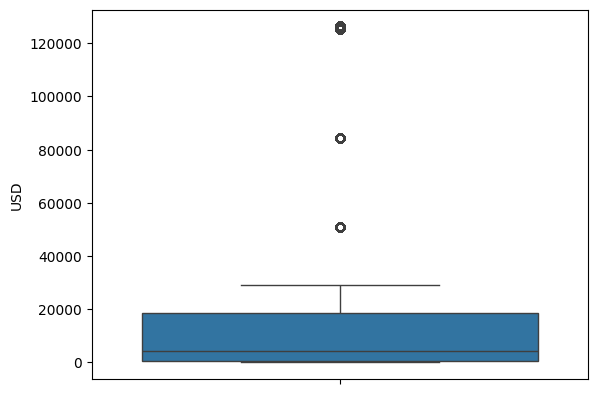

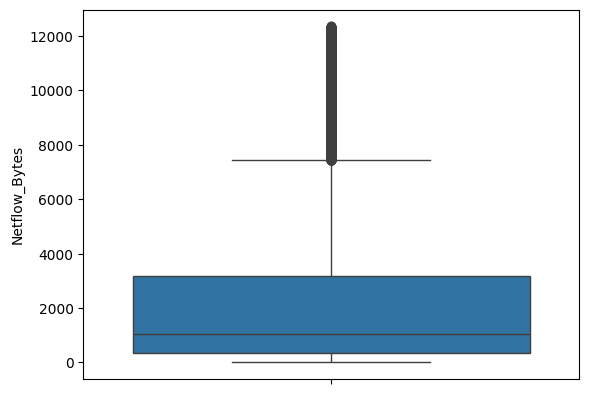

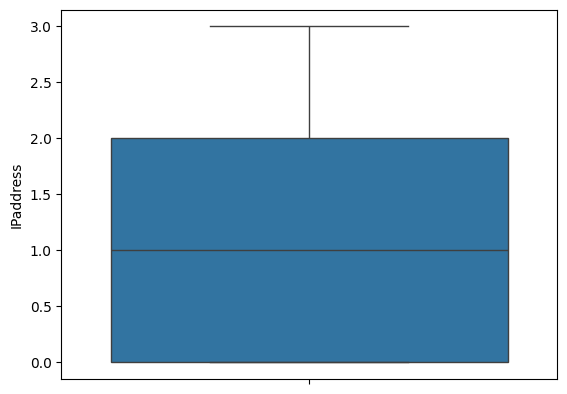

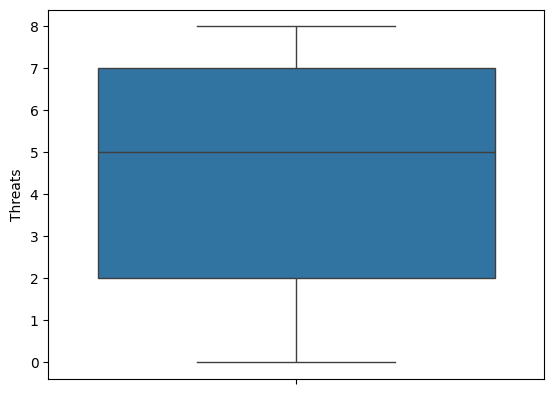

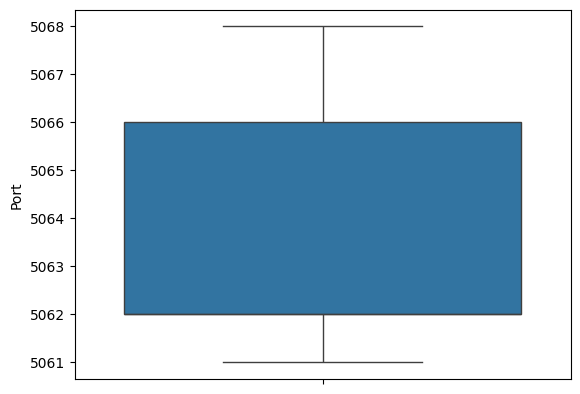

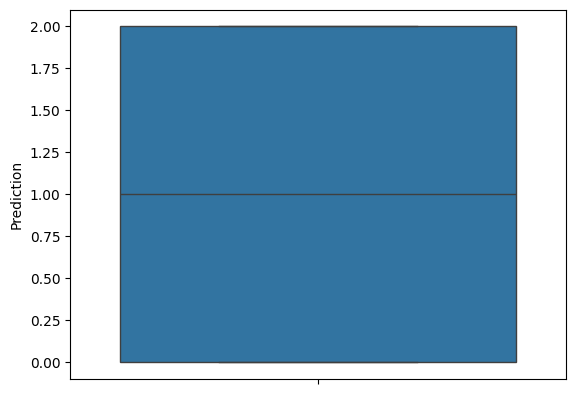

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149043 entries, 0 to 149042
Data columns (total 15 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Time           149043 non-null  int64  
 1   Protcol        149043 non-null  int32  
 2   Flag           149043 non-null  int32  
 3   Family         149043 non-null  object 
 4   Clusters       149043 non-null  int64  
 5   SeddAddress    149043 non-null  int32  
 6   ExpAddress     149043 non-null  int32  
 7   BTC            149043 non-null  int64  
 8   USD            149043 non-null  int64  
 9   Netflow_Bytes  149043 non-null  int64  
 10  IPaddress      149043 non-null  int32  
 11  Threats        149043 non-null  int32  
 12  Port           149043 non-null  int64  
 13  Prediction     149043 non-null  int32  
 14  z-scores       149043 non-null  float64
dtypes: float64(1), int32(7), int64(6), object(1)
memory usage: 13.1+ MB
None
149043
111976


In [28]:
for i in data.select_dtypes(include='number').columns.values:
    sn.boxplot(data[i])
    plt.show()

info={}
for i in data.select_dtypes(include='number').columns.values:
    data['z-scores']=(data[i]-data[i].mean())/data[i].std()
    outlier=np.abs(data['z-scores'] >3).sum()
    if outlier >0:
        info[i]=outlier

print(data.info())

print(len(data))
threshold=2
for x,y in info.items():
    upper=data[x].mean()+threshold*data[x].std()
    lower=data[x].mean()-threshold*data[x].std()
    data=data[(data[x]>lower)&(data[x]<upper)]

print(len(data))


# **Data transformation and finding the optimal correlation**

In [29]:
data['Family']=lab.fit_transform(data['Family'])


values={}
for i in data.columns.values:
    cnt=0
    corri=data.corr()[i]
    corri=corri.drop(['z-scores',i])
    for j in corri.index:
        if corri[j] <0:
            cnt +=1

    values[i]=cnt

print(values)


{'Time': 9, 'Protcol': 8, 'Flag': 6, 'Family': 6, 'Clusters': 10, 'SeddAddress': 7, 'ExpAddress': 5, 'BTC': 9, 'USD': 8, 'Netflow_Bytes': 6, 'IPaddress': 5, 'Threats': 9, 'Port': 7, 'Prediction': 9, 'z-scores': 9}


# **Correlation analysis**

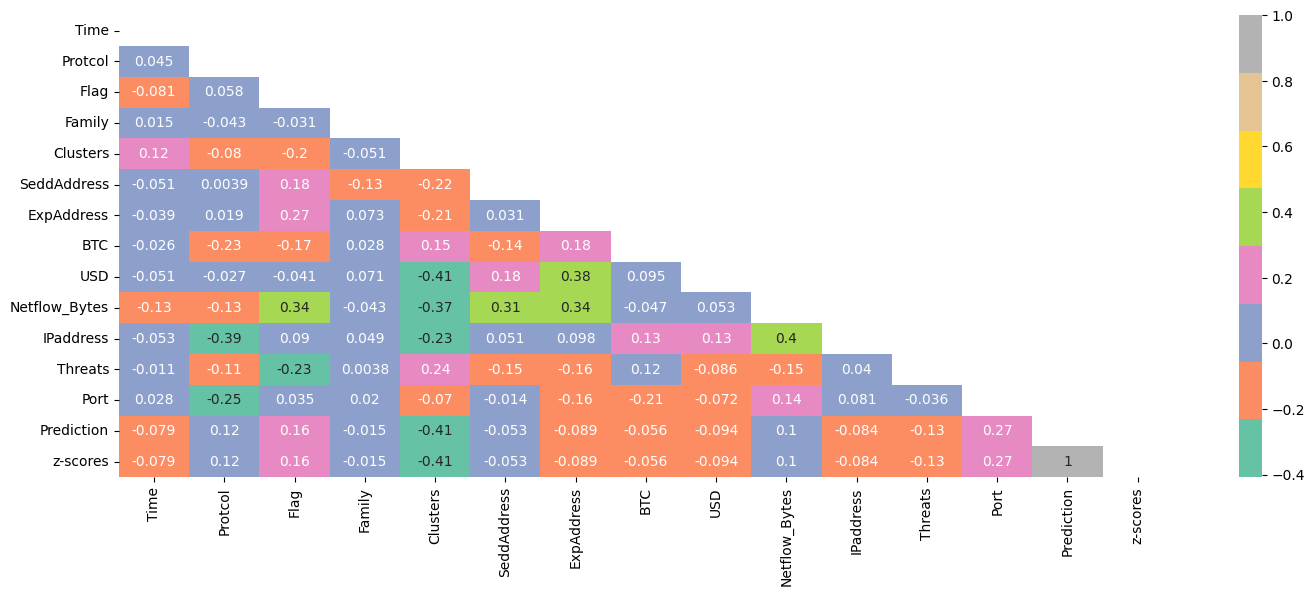

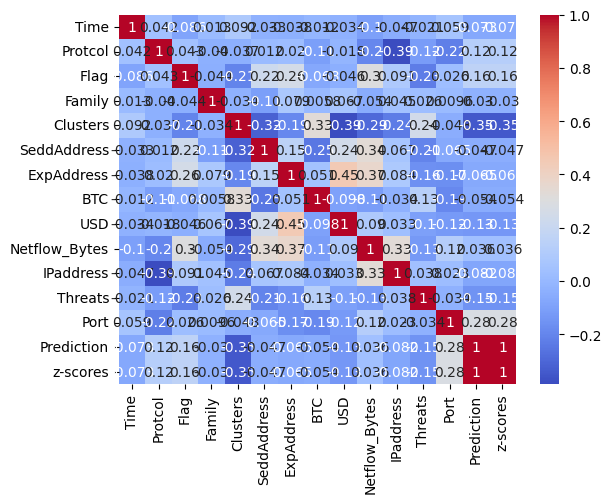

In [30]:
plt.figure(figsize=(17, 6))
corr = data.corr(method='spearman')
my_m = np.triu(corr)
sn.heatmap(corr, mask=my_m, annot=True, cmap="Set2")
plt.show()

correlation_matrix = data.corr()
sn.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

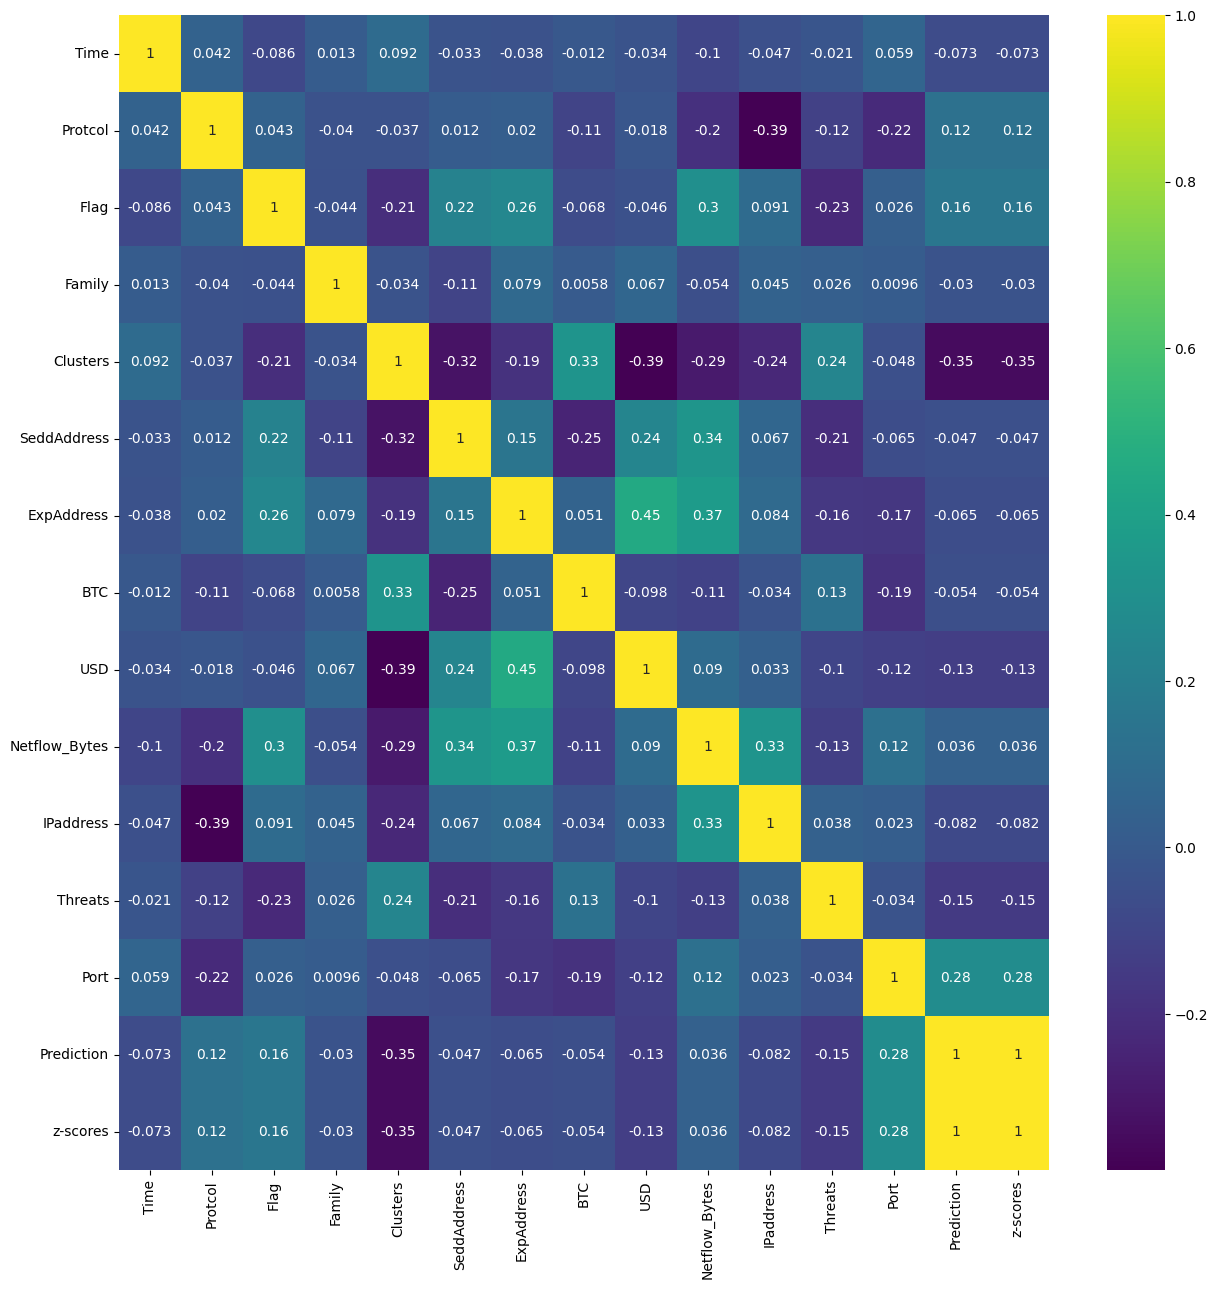

In [31]:
plt.figure(figsize=(15, 15))

correlation_matrix = data.corr()
sn.heatmap(correlation_matrix, annot=True, cmap='viridis')
plt.show()

# **Analysis using Machine Learning for optimal correlated column**

In [32]:
x=[]
y=[]
print("The prediction for FLAG column in data set")
corri = data.corr()['Flag']
corri = corri.drop(['z-scores', 'Flag'])
x_train,x_test,y_train,y_test=train_test_split(data[corri.index],data['Flag'])
lr = LogisticRegression(max_iter=200)
lr.fit(x_train, y_train)
print(f'The logistic regression: for  column ', lr.score(x_test, y_test))

lgb = LGBMClassifier()
lgb.fit(x_train, y_train)
print(f'The LGB for column', lgb.score(x_test, y_test))

tree = DecisionTreeClassifier(criterion='entropy', max_depth=5)
tree.fit(x_train, y_train)
print(f'Dtree for  column', tree.score(x_test,y_test))

linear_svc = LinearSVC()
linear_svc.fit(x_train, y_train)
print(f'The Linear SVC column ',linear_svc.score(x_test,y_test))

mlp_classifier = MLPClassifier()
mlp_classifier.fit(x_train, y_train)
print(f'The MLP classifiers  column',mlp_classifier.score(x_test,y_test))

x=[]
y=[]
print("The prediction for Protcol column in data set")
corri = data.corr()['Protcol']
corri = corri.drop(['z-scores', 'Protcol'])
x_train,x_test,y_train,y_test=train_test_split(data[corri.index],data['Protcol'])
lr = LogisticRegression(max_iter=200)
lr.fit(x_train, y_train)
print(f'The logistic regression: for column ', lr.score(x_test, y_test))

lgb = LGBMClassifier()
lgb.fit(x_train, y_train)
print(f'The LGB for  column', lgb.score(x_test, y_test))

tree = DecisionTreeClassifier(criterion='entropy', max_depth=5)
tree.fit(x_train, y_train)
print(f'Dtree for column', tree.score(x_test,y_test))

linear_svc = LinearSVC()
linear_svc.fit(x_train, y_train)
print(f'The Linear SVC column ',linear_svc.score(x_test,y_test))

mlp_classifier = MLPClassifier()
mlp_classifier.fit(x_train, y_train)
print(f'The MLP classifiers column',mlp_classifier.score(x_test,y_test))

The prediction for FLAG column in data set


C:\Users\samso\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


The logistic regression: for  column  0.4334500250053583
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000727 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 803
[LightGBM] [Info] Number of data points in the train set: 83982, number of used features: 13
[LightGBM] [Info] Start training from score -4.400073
[LightGBM] [Info] Start training from score -1.106106
[LightGBM] [Info] Start training from score -2.747542
[LightGBM] [Info] Start training from score -3.135328
[LightGBM] [Info] Start training from score -2.005800
[LightGBM] [Info] Start training from score -2.062042
[LightGBM] [Info] Start training from score -2.361843
[LightGBM] [Info] Start training from score -2.756314
[LightGBM] [Info] Start training from score -2.041840
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furthe

C:\Users\samso\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


The logistic regression: for column  0.5931628206044153
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000896 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 809
[LightGBM] [Info] Number of data points in the train set: 83982, number of used features: 13
[LightGBM] [Info] Start training from score -1.282450
[LightGBM] [Info] Start training from score -0.850896
[LightGBM] [Info] Start training from score -1.218711
The LGB for  column 0.9952132599842823
Dtree for column 0.9169464885332571
The Linear SVC column  0.6627491605344003
The MLP classifiers column 0.9074087304422376


In [33]:
from sklearn.model_selection import train_test_split

# Ensure data splitting is done correctly
# Example with 'Protcol' column
X = data.drop(columns=['Protcol'])  # Drop the target column for features
Y = data['Protcol']  # Target column

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print(f'x_train shape: {x_train.shape}')
print(f'x_test shape: {x_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

# Ensure y_train and y_test are 1D arrays
y_train_binary = y_train.ravel()
y_test_binary = y_test.ravel()

print(f'y_train_binary shape: {y_train_binary.shape}')
print(f'y_test_binary shape: {y_test_binary.shape}')

# Now proceed with fitting the models


x_train shape: (89580, 14)
x_test shape: (22396, 14)
y_train shape: (89580,)
y_test shape: (22396,)
y_train_binary shape: (89580,)
y_test_binary shape: (22396,)


C:\Users\samso\AppData\Local\Temp\ipykernel_5548\1463984822.py:16: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  y_train_binary = y_train.ravel()
C:\Users\samso\AppData\Local\Temp\ipykernel_5548\1463984822.py:17: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  y_test_binary = y_test.ravel()


In [34]:
# Print shapes to debug the issue
print(f'x_train shape: {x_train.shape}')
print(f'x_test shape: {x_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

# Ensure y_train and y_test are 1D arrays
y_train_binary = y_train.ravel()
y_test_binary = y_test.ravel()

print(f'y_train_binary shape: {y_train_binary.shape}')
print(f'y_test_binary shape: {y_test_binary.shape}')

# Logistic Regression
lr = LogisticRegression(max_iter=200)
lr.fit(x_train, y_train_binary)
y_pred_lr = lr.predict(x_test)
print("Logistic Regression:")
print("Accuracy:", accuracy_score(y_test_binary, y_pred_lr))
print("Precision:", precision_score(y_test_binary, y_pred_lr, average='weighted'))
print("Recall:", recall_score(y_test_binary, y_pred_lr, average='weighted'))
print("F1 Score:", f1_score(y_test_binary, y_pred_lr, average='weighted'))

# LightGBM
lgb = LGBMClassifier()
lgb.fit(x_train, y_train_binary)
y_pred_lgb = lgb.predict(x_test)
print("\nLightGBM:")
print("Accuracy:", accuracy_score(y_test_binary, y_pred_lgb))
print("Precision:", precision_score(y_test_binary, y_pred_lgb, average='weighted'))
print("Recall:", recall_score(y_test_binary, y_pred_lgb, average='weighted'))
print("F1 Score:", f1_score(y_test_binary, y_pred_lgb, average='weighted'))

# Decision Tree
tree = DecisionTreeClassifier(criterion='entropy', max_depth=5)
tree.fit(x_train, y_train_binary)
y_pred_tree = tree.predict(x_test)
print("\nDecision Tree:")
print("Accuracy:", accuracy_score(y_test_binary, y_pred_tree))
print("Precision:", precision_score(y_test_binary, y_pred_tree, average='weighted'))
print("Recall:", recall_score(y_test_binary, y_pred_tree, average='weighted'))
print("F1 Score:", f1_score(y_test_binary, y_pred_tree, average='weighted'))

# Linear SVC
linear_svc = LinearSVC()
linear_svc.fit(x_train, y_train_binary)
y_pred_svc = linear_svc.predict(x_test)
print("\nLinear SVC:")
print("Accuracy:", accuracy_score(y_test_binary, y_pred_svc))
print("Precision:", precision_score(y_test_binary, y_pred_svc, average='weighted'))
print("Recall:", recall_score(y_test_binary, y_pred_svc, average='weighted'))
print("F1 Score:", f1_score(y_test_binary, y_pred_svc, average='weighted'))

# MLP Classifier
mlp_classifier = MLPClassifier()
mlp_classifier.fit(x_train, y_train_binary)
y_pred_mlp = mlp_classifier.predict(x_test)
print("\nMLP Classifier:")
print("Accuracy:", accuracy_score(y_test_binary, y_pred_mlp))
print("Precision:", precision_score(y_test_binary, y_pred_mlp, average='weighted'))
print("Recall:", recall_score(y_test_binary, y_pred_mlp, average='weighted'))
print("F1 Score:", f1_score(y_test_binary, y_pred_mlp, average='weighted'))


x_train shape: (89580, 14)
x_test shape: (22396, 14)
y_train shape: (89580,)
y_test shape: (22396,)
y_train_binary shape: (89580,)
y_test_binary shape: (22396,)


C:\Users\samso\AppData\Local\Temp\ipykernel_5548\2974485476.py:8: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  y_train_binary = y_train.ravel()
C:\Users\samso\AppData\Local\Temp\ipykernel_5548\2974485476.py:9: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  y_test_binary = y_test.ravel()
C:\Users\samso\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alterna

Logistic Regression:
Accuracy: 0.5634488301482408
Precision: 0.5465575939375
Recall: 0.5634488301482408
F1 Score: 0.5458658119218908
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000782 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 813
[LightGBM] [Info] Number of data points in the train set: 89580, number of used features: 14
[LightGBM] [Info] Start training from score -1.282154
[LightGBM] [Info] Start training from score -0.851799
[LightGBM] [Info] Start training from score -1.217686

LightGBM:
Accuracy: 0.9958921235934989
Precision: 0.9958928934276513
Recall: 0.9958921235934989
F1 Score: 0.9958921277052203

Decision Tree:
Accuracy: 0.9181103768530094
Precision: 0.9176456502809767
Recall: 0.9181103768530094
F1 Score: 0.9178417737331543

Linear SVC:
Accuracy: 0.6650294695481336
Precision: 0.6630899591085418
Recall: 0.66502946954813

In [35]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import label_binarize
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
import pandas as pd

# Ensure y_train and y_test are 1D arrays
y_train_binary = y_train.ravel()
y_test_binary = y_test.ravel()

# Initialize a dictionary to store the metrics
metrics = {
    "Model": [],
    "Accuracy": [],
    "Precision": [],
    "Recall": [],
    "F1 Score": [],
    "ROC AUC": []
}

# Logistic Regression
lr = LogisticRegression(max_iter=200)
lr.fit(x_train, y_train_binary)
y_pred_lr = lr.predict(x_test)
metrics["Model"].append("Logistic Regression")
metrics["Accuracy"].append(accuracy_score(y_test_binary, y_pred_lr))
metrics["Precision"].append(precision_score(y_test_binary, y_pred_lr, average='weighted'))
metrics["Recall"].append(recall_score(y_test_binary, y_pred_lr, average='weighted'))
metrics["F1 Score"].append(f1_score(y_test_binary, y_pred_lr, average='weighted'))
metrics["ROC AUC"].append(roc_auc_score(label_binarize(y_test_binary, classes=[0, 1, 2]), label_binarize(y_pred_lr, classes=[0, 1, 2]), average='weighted', multi_class='ovr'))

# LightGBM
lgb = LGBMClassifier()
lgb.fit(x_train, y_train_binary)
y_pred_lgb = lgb.predict(x_test)
metrics["Model"].append("LightGBM")
metrics["Accuracy"].append(accuracy_score(y_test_binary, y_pred_lgb))
metrics["Precision"].append(precision_score(y_test_binary, y_pred_lgb, average='weighted'))
metrics["Recall"].append(recall_score(y_test_binary, y_pred_lgb, average='weighted'))
metrics["F1 Score"].append(f1_score(y_test_binary, y_pred_lgb, average='weighted'))
metrics["ROC AUC"].append(roc_auc_score(label_binarize(y_test_binary, classes=[0, 1, 2]), label_binarize(y_pred_lgb, classes=[0, 1, 2]), average='weighted', multi_class='ovr'))

# Decision Tree
tree = DecisionTreeClassifier(criterion='entropy', max_depth=5)
tree.fit(x_train, y_train_binary)
y_pred_tree = tree.predict(x_test)
metrics["Model"].append("Decision Tree")
metrics["Accuracy"].append(accuracy_score(y_test_binary, y_pred_tree))
metrics["Precision"].append(precision_score(y_test_binary, y_pred_tree, average='weighted'))
metrics["Recall"].append(recall_score(y_test_binary, y_pred_tree, average='weighted'))
metrics["F1 Score"].append(f1_score(y_test_binary, y_pred_tree, average='weighted'))
metrics["ROC AUC"].append(roc_auc_score(label_binarize(y_test_binary, classes=[0, 1, 2]), label_binarize(y_pred_tree, classes=[0, 1, 2]), average='weighted', multi_class='ovr'))

# Linear SVC
linear_svc = LinearSVC()
linear_svc.fit(x_train, y_train_binary)
y_pred_svc = linear_svc.predict(x_test)
metrics["Model"].append("Linear SVC")
metrics["Accuracy"].append(accuracy_score(y_test_binary, y_pred_svc))
metrics["Precision"].append(precision_score(y_test_binary, y_pred_svc, average='weighted'))
metrics["Recall"].append(recall_score(y_test_binary, y_pred_svc, average='weighted'))
metrics["F1 Score"].append(f1_score(y_test_binary, y_pred_svc, average='weighted'))
metrics["ROC AUC"].append(roc_auc_score(label_binarize(y_test_binary, classes=[0, 1, 2]), label_binarize(y_pred_svc, classes=[0, 1, 2]), average='weighted', multi_class='ovr'))

# MLP Classifier
mlp_classifier = MLPClassifier()
mlp_classifier.fit(x_train, y_train_binary)
y_pred_mlp = mlp_classifier.predict(x_test)
metrics["Model"].append("MLP Classifier")
metrics["Accuracy"].append(accuracy_score(y_test_binary, y_pred_mlp))
metrics["Precision"].append(precision_score(y_test_binary, y_pred_mlp, average='weighted'))
metrics["Recall"].append(recall_score(y_test_binary, y_pred_mlp, average='weighted'))
metrics["F1 Score"].append(f1_score(y_test_binary, y_pred_mlp, average='weighted'))
metrics["ROC AUC"].append(roc_auc_score(label_binarize(y_test_binary, classes=[0, 1, 2]), label_binarize(y_pred_mlp, classes=[0, 1, 2]), average='weighted', multi_class='ovr'))

# Convert the metrics dictionary to a DataFrame
metrics_df = pd.DataFrame(metrics)

# Display the DataFrame
print(metrics_df)


C:\Users\samso\AppData\Local\Temp\ipykernel_5548\2864822360.py:11: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  y_train_binary = y_train.ravel()
C:\Users\samso\AppData\Local\Temp\ipykernel_5548\2864822360.py:12: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  y_test_binary = y_test.ravel()
C:\Users\samso\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alter

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000949 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 813
[LightGBM] [Info] Number of data points in the train set: 89580, number of used features: 14
[LightGBM] [Info] Start training from score -1.282154
[LightGBM] [Info] Start training from score -0.851799
[LightGBM] [Info] Start training from score -1.217686
                 Model  Accuracy  Precision    Recall  F1 Score   ROC AUC
0  Logistic Regression  0.563449   0.546558  0.563449  0.545866  0.654814
1             LightGBM  0.995892   0.995893  0.995892  0.995892  0.997106
2        Decision Tree  0.918110   0.917646  0.918110  0.917842  0.940076
3           Linear SVC  0.665029   0.663090  0.665029  0.660218  0.737447
4       MLP Classifier  0.862252   0.878766  0.862252  0.853643  0.893153


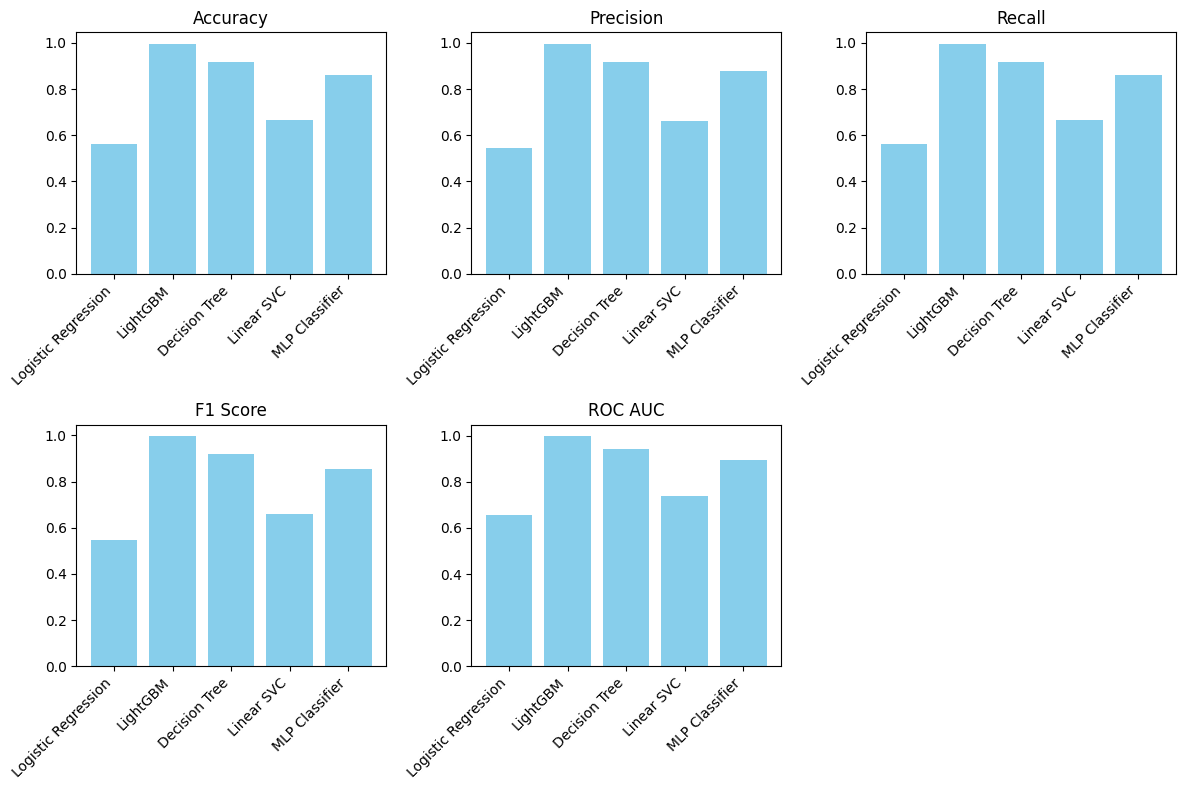

In [36]:
import matplotlib.pyplot as plt

# Convert the metrics dictionary to a DataFrame
metrics_df = pd.DataFrame(metrics)

# Set the figure size
plt.figure(figsize=(12, 8))

# Create a subplot for each metric
metrics_list = ["Accuracy", "Precision", "Recall", "F1 Score", "ROC AUC"]
for i, metric in enumerate(metrics_list, 1):
    plt.subplot(2, 3, i)
    plt.bar(metrics_df["Model"], metrics_df[metric], color='skyblue')
    plt.title(metric)
    plt.xticks(rotation=45, ha='right')

# Adjust layout
plt.tight_layout()
plt.show()


we can make the following interpretations regarding the performance of different machine learning models on the UGRansome dataset:

Accuracy:

LightGBM and Decision Tree classifiers have the highest accuracy, suggesting they are the most accurate models for this dataset.

Logistic Regression has the lowest accuracy, indicating it is less suitable for this dataset.

Precision:

LightGBM and Decision Tree classifiers again show the highest precision, meaning they have a lower false positive rate compared to other models.

Logistic Regression has the lowest precision.

Recall:

LightGBM shows the highest recall, indicating it can identify most of the relevant instances (low false negative rate).

Logistic Regression has the lowest recall.

F1 Score:

LightGBM has the highest F1 score, suggesting a good balance between precision and recall.

Logistic Regression has the lowest F1 score.

ROC AUC:

LightGBM and Decision Tree classifiers have the highest ROC AUC, indicating good model performance in distinguishing between the classes.

Logistic Regression has the lowest ROC AUC.

Overall Interpretation:

LightGBM is the top-performing model across all metrics (Accuracy, Precision, Recall, F1 Score, ROC AUC), making it the most suitable model for anomaly detection in zero-day attacks and ransomware in the UGRansome dataset.

Decision Tree also performs well but is slightly less effective than LightGBM.

MLP Classifier and Linear SVC have moderate performance.

Logistic Regression performs the worst among the compared models, making it less effective for this particular task.


# **Deep Learning Analysis for Protocols Column**

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
import keras

# Assuming data is a pandas DataFrame
X = []
Y = to_categorical(data['Protcol'])

corr = data.corr()['Protcol']
corr = corr.drop(['z-scores', 'Protcol'])
for i in corr.index:
    if corr[i] > 0:
        X.append(i)

x_train, x_test, y_train, y_test = train_test_split(data[X], Y)

models = Sequential()
models.add(Dense(units=data[X].shape[1], input_dim=data[X].shape[1], activation=keras.activations.softmax))
models.add(Dense(units=data[X].shape[1], activation=keras.activations.relu))
models.add(Dense(units=data[X].shape[1], activation=keras.activations.relu))
models.add(Dense(units=data[X].shape[1], activation=keras.activations.relu))
models.add(Dense(units=data[X].shape[1], activation=keras.activations.softmax))
models.add(Dense(units=Y.shape[1], activation=keras.activations.softmax))

models.compile(optimizer='adam', loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

hist = models.fit(x_train, y_train, batch_size=20, epochs=60)


Epoch 1/60


C:\Users\samso\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4200/4200 ━━━━━━━━━━━━━━━━━━━━ 5s 870us/step - accuracy: 0.4331 - loss: 1.0733
Epoch 2/60
4200/4200 ━━━━━━━━━━━━━━━━━━━━ 4s 836us/step - accuracy: 0.4855 - loss: 0.9736
Epoch 3/60
4200/4200 ━━━━━━━━━━━━━━━━━━━━ 4s 842us/step - accuracy: 0.5000 - loss: 0.9232
Epoch 4/60
4200/4200 ━━━━━━━━━━━━━━━━━━━━ 3s 812us/step - accuracy: 0.5107 - loss: 0.9033
Epoch 5/60
4200/4200 ━━━━━━━━━━━━━━━━━━━━ 4s 911us/step - accuracy: 0.5123 - loss: 0.8843
Epoch 6/60
4200/4200 ━━━━━━━━━━━━━━━━━━━━ 3s 804us/step - accuracy: 0.5455 - loss: 0.8679
Epoch 7/60
4200/4200 ━━━━━━━━━━━━━━━━━━━━ 3s 800us/step - accuracy: 0.5672 - loss: 0.8518
Epoch 8/60
4200/4200 ━━━━━━━━━━━━━━━━━━━━ 3s 805us/step - accuracy: 0.5623 - loss: 0.8529
Epoch 9/60
4200/4200 ━━━━━━━━━━━━━━━━━━━━ 3s 807us/step - accuracy: 0.5659 - loss: 0.8339
Epoch 10/60
4200/4200 ━━━━━━━━━━━━━━━━━━━━ 3s 803us/step - accuracy: 0.5721 - loss: 0.8324
Epoch 11/60
4200/4200 ━━━━━━━━━━━━━━━━━━━━ 3s 792us/step - accuracy: 0.5734 - loss: 0.8299
Epoch 12/60
4200/42

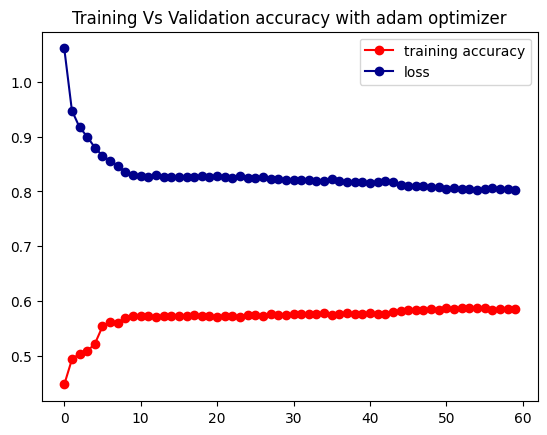

In [38]:
plt.plot(hist.history['accuracy'], label='training accuracy', marker='o', color='red')
plt.plot(hist.history['loss'], label='loss', marker='o', color='darkblue')
plt.title('Training Vs Validation accuracy with adam optimizer')
plt.legend()
plt.show()


In [39]:
# Deep Learning Model Evaluation
y_pred_dl = models.predict(x_test)
y_pred_classes = np.argmax(y_pred_dl, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

print("\nDeep Learning Model:")
print("Accuracy:", accuracy_score(y_test_classes, y_pred_classes))
print("Precision:", precision_score(y_test_classes, y_pred_classes, average='weighted'))
print("Recall:", recall_score(y_test_classes, y_pred_classes, average='weighted'))
print("F1 Score:", f1_score(y_test_classes, y_pred_classes, average='weighted'))


875/875 ━━━━━━━━━━━━━━━━━━━━ 1s 772us/step

Deep Learning Model:
Accuracy: 0.5855183253554334
Precision: 0.6734470203114407
Recall: 0.5855183253554334
F1 Score: 0.5374574361413814
